# Plot the soft-thresholding operator
## $$
\left[S_{\lambda}(\beta)\right]_{i}=\left\{\begin{array}{ll}
\beta_{i}-\lambda & \text { if } \beta_{i}>\lambda \\
0 & \text { if }-\lambda \leq \beta_{i} \leq \lambda, \quad i=1, \ldots, n \\
\beta_{i}+\lambda & \text { if } \beta_{i}<-\lambda
\end{array}\right.
$$

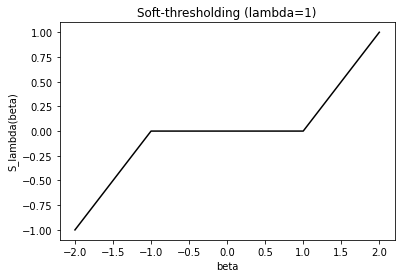

In [9]:
# In this code, we visualize Soft-thresholding function
#========================================

# Import packages
import numpy as np
import matplotlib.pyplot as plt

# If you don't run this code in Jupyter notebook, you don't need this line
%matplotlib inline

# Define the soft thresholding function
def soft_thresh(beta, lam):
    return np.sign(beta) * np.maximum(np.abs(beta) - lam, 0.)

# Here you can set different lambda value
lam=1

# We draw picture of S with respect to beta on [-2,2]
beta=np.linspace(-2,2,101)
y=np.zeros(beta.shape)
for i in range(len(beta)):
    y[i]=soft_thresh(beta[i],lam)

# Draw picture
fig1=plt.figure()
ax1=fig1.add_subplot(111)
p1=ax1.plot(beta,y,color="black")
plt.xlabel("beta")
plt.ylabel("S_lambda(beta)")
plt.title("Soft-thresholding (lambda="+str(lam)+")")
plt.show()


# Solving lasso regression with ISTA and subgradient method
### Given dataset $\{(x_i,y_i)\}_{i=1}^n$, $(x_i\in\mathbb{R}^m,y_i\in \mathbb{R})$, find $\beta$ that minimize:
## $$\min_\beta L(\beta)=\|y-X\beta\|^2_2+\lambda \|\beta\|_1$$
### Using ***ISTA*** and ***subgradient method***.

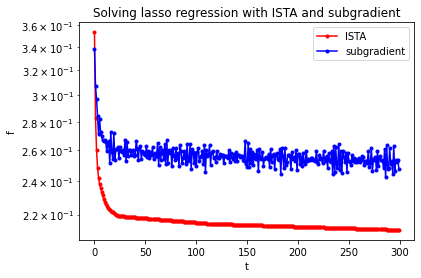

In [24]:
# In this code, we compare ISTA and subgradient method
#========================================

# Import packages
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# If you don't run this code in Jupyter notebook, you don't need this line
%matplotlib inline

# Soft-thresholding function
def soft_thresh(beta, lam):
    return np.sign(beta) * np.maximum(np.abs(beta) - lam, 0.)

# ISTA
def ista(A, b, lam, maxit,beta):
# t_all and f_all are two empty lists that save iteration number and corresponding function value respectively 
    t_all = []
    f_all = []
# Solve the Lipschitz constant
    L = linalg.norm(A) ** 2
# Use ISTA to find solution for the lasso problem
    for i in range(maxit):
        beta = soft_thresh(beta + np.dot(A.T, b - A.dot(beta)) / L, lam / L)
        f = 0.5 * linalg.norm(A.dot(beta) - b) ** 2 + lam * linalg.norm(beta, 1)
        f_all.append(f)
        t_all.append(i)
        
    return beta, f_all, t_all

# Subgradient
def subgrad(A, b, lam, maxit,beta):
# t_all and f_all are two empty lists that save iteration number and corresponding function value respectively 
    t_all = []
    f_all = []
# Solve the Lipschitz constant
    L = linalg.norm(A) ** 2
# Define the step size
    t = 1/L
# Use subgradietn method to find solution for the lasso problem
    for i in range(maxit):
        beta=beta-t*(np.matmul(b-A.dot(beta),-A)+lam*np.sign(beta))
        f = 0.5 * linalg.norm(A.dot(beta) - b) ** 2 + lam * linalg.norm(beta, 1)
        f_all.append(f)
        t_all.append(i)
        
    return beta, f_all, t_all

# A is a m-by-n matrix
m, n = 2, 40

# The max iteration number
maxit=300

# Randomly set A
A = np.random.randn(m, n)

# Define the regularization parameter
lam = 0.5 

# Randomly set the best beta
betastar = np.random.rand(n)
betastar[betastar<0.85]=0

# Find the corresponding b
b = np.dot(A, betastar)

# Find the best objective value
fstar=0.5 * linalg.norm(A.dot(betastar) - b) ** 2 + lam * linalg.norm(betastar, 1)



# Initialize beta
beta0=np.zeros(A.shape[1])

# Solve the problem with ISTA and subgradient method respectively
beta_ista, f_ista, times_ista = ista(A, b, lam, maxit,beta0)
beta_grad, f_grad, times_grad = subgrad(A, b, lam, maxit,beta0)

# Draw the picture
fig2=plt.figure()
ax2=fig2.add_subplot(111)
plt.semilogy(times_ista, f_ista,"r.-", label='ISTA')
plt.semilogy(times_grad, f_grad,"b.-", label='subgradient')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Solving lasso regression with ISTA and subgradient')
plt.legend()
plt.savefig("istavssub.png", dpi=200, bbox_inches='tight')
plt.show()

# Solving lasso regression with ISTA and ISTA + Nesterov
### Given dataset $\{(x_i,y_i)\}_{i=1}^n$, $(x_i\in\mathbb{R}^m,y_i\in \mathbb{R})$, find $\beta$ that minimize:
## $$\min_\beta L(\beta)=\|y-X\beta\|^2_2+\lambda \|\beta\|_1$$
### Using ***ISTA*** and ***ISTA + Nesterov***.

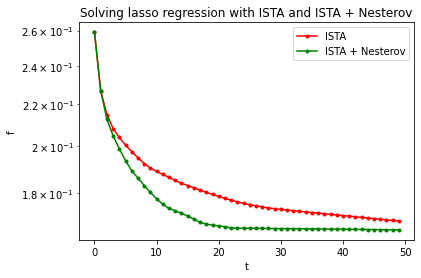

In [2]:
# In this code, we compare ISTA and ISTA with Nesterov acceleration
#========================================

# Import packages
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# If you don't run this code in Jupyter notebook, you don't need this line
%matplotlib inline

# Soft-thresholding function
def soft_thresh(beta, lam):
    return np.sign(beta) * np.maximum(np.abs(beta) - lam, 0.)

# ISTA is defined same as above
def ista(A, b, lam, maxit,beta):
    t_all = []
    f_all = []
    L = linalg.norm(A) ** 2  
    for i in range(maxit):
        beta = soft_thresh(beta + np.dot(A.T, b - A.dot(beta)) / L, lam / L)
        f = 0.5 * linalg.norm(A.dot(beta) - b) ** 2 + lam * linalg.norm(beta, 1)
        f_all.append(f)
        t_all.append(i)
        
    return beta, f_all, t_all

# ISTA with Nesterov acceleration
def ista_Nesterov(A,b,lam,maxit,beta):
# t_all and f_all are two empty lists that save iteration number and corresponding function value respectively 
    t_all = []
    f_all = []
# Solve lipschize constant
    L = linalg.norm(A) ** 2 
# Save beta of the past two iteration
    betak1=beta
    betak2=beta
# Use subgradietn method to find solution for the lasso problem
    for i in range(maxit):
        v=betak1+(i+1-2)/(i+1+1)*(betak1-betak2)
        beta = soft_thresh(v + np.dot(A.T, b - A.dot(v)) / L, lam / L)
        f = 0.5 * linalg.norm(A.dot(beta) - b) ** 2 + lam * linalg.norm(beta, 1)
        f_all.append(f)
        t_all.append(i)
        betak2=betak1
        betak1=beta
        
    return beta, f_all, t_all
    
# The problem is defined same as before       
m, n = 2, 40
maxit=50
A = np.random.randn(m, n)
lam = 0.5
betastar = np.random.rand(n)
betastar[betastar<0.85]=0
b = np.dot(A, betastar)
fstar=0.5 * linalg.norm(A.dot(betastar) - b) ** 2 + lam * linalg.norm(betastar, 1)

# Initialize beta
beta0=np.zeros(A.shape[1])
# Solve the problem with ISTA and ISTA with Nesterov acceleration
beta_ista, f_ista, times_ista = ista(A, b, lam, maxit,beta0)
beta_istan, f_istan, times_istan = ista_Nesterov(A, b, lam, maxit,beta0)

# Draw the picture
fig2=plt.figure()
ax2=fig2.add_subplot(111)
plt.semilogy(times_ista, f_ista,"r.-", label='ISTA')
plt.semilogy(times_istan, f_istan,"g.-", label='ISTA + Nesterov')
plt.xlabel('t')
plt.ylabel('f')
plt.title('Solving lasso regression with ISTA and ISTA + Nesterov')
plt.legend()
plt.savefig("istavsnest.png", dpi=200, bbox_inches='tight')
plt.show()